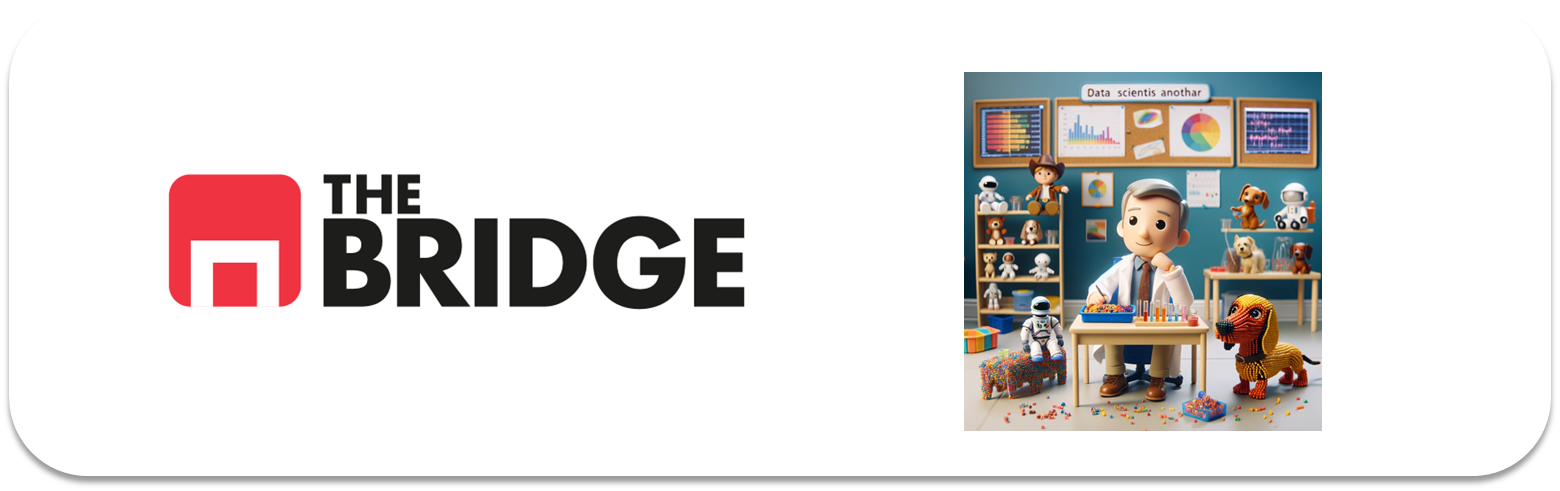

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import pandas as pd
import seaborn as sns

import bootcampviztools as bcvt


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:


* ejecuta ```Python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df_titanic = sns.load_dataset('titanic')

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [4]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Las siguientes columnas tienen al menos un valor nulo en su fila
columns_with_na = [column for column in df_titanic.columns if df_titanic[column].isna().any()]
columns_with_na

['age', 'embarked', 'deck', 'embark_town']

In [7]:
df_titanic[df_titanic.duplicated(keep=False)]   # Hay muchos elementos duplicados, pero no me preocupa de momento porque hay datos faltantes

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [8]:
for column in columns_with_na:
    print(f'{column}: {round(df_titanic[column].isna().mean(), 4)}')     #  porcentaje de valores nulos

age: 0.1987
embarked: 0.0022
deck: 0.7722
embark_town: 0.0022


In [9]:
# Hago una copia del data frame. Esta será sobre la que voy a aplicar las modificaciones e hipótesis
titanic_mod = df_titanic.copy()

In [10]:
mask = titanic_mod['embarked'].isna() | titanic_mod['embark_town'].isna()
titanic_mod[mask]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


Solo son dos filas con valores NaN (algo que ya sabíamos) y no parece poder inferirse con ningún criterio esa información, así que los elimino porque no va afectar negativamente a los análisis.

In [11]:
titanic_mod.dropna(subset=['embarked', 'embark_town'], inplace=True) # Elimina las filas con valores nulos de 'embarked' y 'embark_town'

Además, se demuestra en la siguiente linea que las letras de "embarked", coinciden con la primera letra de cada elemento de "embark_town", así que contienen información redundante, y por tanto vamos a eliminar la columna "embarked".

In [12]:
(titanic_mod['embarked'] == titanic_mod['embark_town'].str[0]).value_counts() # Comprobar que todas las primeras letras de "embark_town" coinciden con "embark"

True    889
Name: count, dtype: int64

In [13]:
titanic_mod.drop(columns=['embarked'], inplace=True)    # Eliminar la columna redundante "embarked"

In [14]:
titanic_mod['deck'].value_counts(normalize=True, dropna=False)  # Analizar los valores de "deck"

deck
NaN    0.773903
C      0.066367
B      0.050619
D      0.037120
E      0.035996
A      0.016873
F      0.014623
G      0.004499
Name: proportion, dtype: float64

"deck" tiene demasiado valores nulos como para estimar de primeras su valor o poder relacionarlo con otras columnas. No hago nada con ella pero no la usaré de momento en los análisis.

In [15]:
titanic_mod.age.describe()  # analizo la columna "deck"

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

Hay dispersión en los resultados de la edad, pero los valores missings no son tantos. Las edades van desde los 0.42 años (bebés) hasta 80 años. Voy a sustituir los valores NaN por la mediana (cuartil 50%), pero a la vez creo una nueva columna que indique que ese dato es estimado, y no original del data frame.

In [16]:
titanic_mod.age.median()

28.0

In [17]:
titanic_mod['age_was_NaN'] = titanic_mod['age'].isna() # marcar los valores que originalmente eran NaN

In [18]:
titanic_mod.fillna({'age': titanic_mod.age.median()}, inplace=True) # sustituye los valores NaN por la mediana

In [19]:
titanic_mod.drop(columns=['parch'], inplace=True)    # Eliminar la columna "parch" porque lo pide el enunciado

In [20]:
titanic_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   fare         889 non-null    float64 
 6   class        889 non-null    category
 7   who          889 non-null    object  
 8   adult_male   889 non-null    bool    
 9   deck         201 non-null    category
 10  embark_town  889 non-null    object  
 11  alive        889 non-null    object  
 12  alone        889 non-null    bool    
 13  age_was_NaN  889 non-null    bool    
dtypes: bool(3), category(2), float64(2), int64(3), object(4)
memory usage: 74.3+ KB


In [21]:
titanic_mod

,survived,pclass,sex,age,sibsp,fare,class,who,adult_male,deck,embark_town,alive,alone,age_was_NaN
0,0,3,male,22.0,1,7.2500,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,71.2833,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,female,26.0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,female,35.0,1,53.1000,First,woman,False,C,Southampton,yes,False,False
4,0,3,male,35.0,0,8.0500,Third,man,True,NaN,Southampton,no,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,Second,man,True,NaN,Southampton,no,True,False
887,1,1,female,19.0,0,30.0000,First,woman,False,B,Southampton,yes,True,False
888,0,3,female,28.0,1,23.4500,Third,woman,False,NaN,Southampton,no,False,True
889,1,1,male,26.0,0,30.0000,First,man,True,C,Cherbourg,yes,True,False


In [22]:
for column in titanic_mod.columns:
    print(f'{column}: {titanic_mod[column].value_counts()} \n ---- ')

survived: survived
0    549
1    340
Name: count, dtype: int64 
 ---- 
pclass: pclass
3    491
1    214
2    184
Name: count, dtype: int64 
 ---- 
sex: sex
male      577
female    312
Name: count, dtype: int64 
 ---- 
age: age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64 
 ---- 
sibsp: sibsp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64 
 ---- 
fare: fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 247, dtype: int64 
 ---- 
class: class
Third     491
First     214
Second    184
Name: count, dtype: int64 
 ---- 
who: who
man      537
woman    269
child     83
Name: count, dtype: int64 
 ---- 
adult_male: adult_male
True     537
False    352
Name: count, dtype: int64 
 ---- 
deck: de

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona. ```--> Eliminé esta columna porque vi que era redundante```




| Columna/Variable | Descripción | Notas |
| ---------------- | ----------- | ----- |
|survived|Es una columna de booleanos (en forma de 0 y 1) de si sobrevivió|Puede ser redundante con "alive"|
|pclass|Clase del pasajero (primera, segunda, tercera)| Posiblemente redundante con "class" |
|sex|Hombre o mujer
|age|Edad
|sibsp|Número de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
|fare|Precio del billete
|class|Clase del billete|Posiblemente redundante con "pclass"
|who| Hombre, mujer o niño/niña |
|adult_male | Hombre adulto | Booleano
|deck | Planta del transatlántico
|embark_town | Ciudad de origen de embarque
|alive | Sobrevivió | Puede ser redundante con "survived"
|alone | Viajaba solo
|age_was_NaN | Columna que etiqueta si la edad del pasajero era originalmente "NaN" y se ha sustituido por la mediana


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [23]:
# Ya lo he hecho antes, eliminado la columna "embarked", y manteniendo "embark_town", después de comprobar
# que tenían la misma información

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [24]:
def cardinalidad(df_in, umbral_categoria, umbral_continua):
    '''
    Define que tipo de variable es una columna en función de su cardinalidad.
    '''
    df_out = pd.DataFrame([df_in.nunique(), df_in.nunique()/len(df_in) * 100, df_in.dtypes])
    df_out = df_out.T.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})
    

    df_out.loc[df_out["Card"] < umbral_categoria, "Clase"] = "Categórica"    
    df_out.loc[df_out["Card"] == 2, "Clase"] = "Binaria"
    df_out.loc[df_out["Card"] >= umbral_categoria, "Clase"] ="Numérica Discreta"
    df_out.loc[df_out["%_Card"] > umbral_continua, "Clase"] = "Numérica Continua"
    
    return df_out

In [27]:
titanic_cardinalidad = cardinalidad(titanic_mod, 15, 20)   # Estoy conforme con esta definicón de clases y la usaré para el análisis
titanic_cardinalidad

,Card,%_Card,Tipo,Clase
survived,2,0.224972,int64,Binaria
pclass,3,0.337458,int64,Categórica
sex,2,0.224972,object,Binaria
age,88,9.898763,float64,Numérica Discreta
sibsp,7,0.787402,int64,Categórica
fare,247,27.784027,float64,Numérica Continua
class,3,0.337458,category,Categórica
who,3,0.337458,object,Categórica
adult_male,2,0.224972,bool,Binaria
deck,7,0.787402,category,Categórica


### #2.1 Categóricas

In [50]:
col_categoricas = ['survived', 'who', 'class', 'embark_town', 'alone'] # Vamos a analizar solo estas

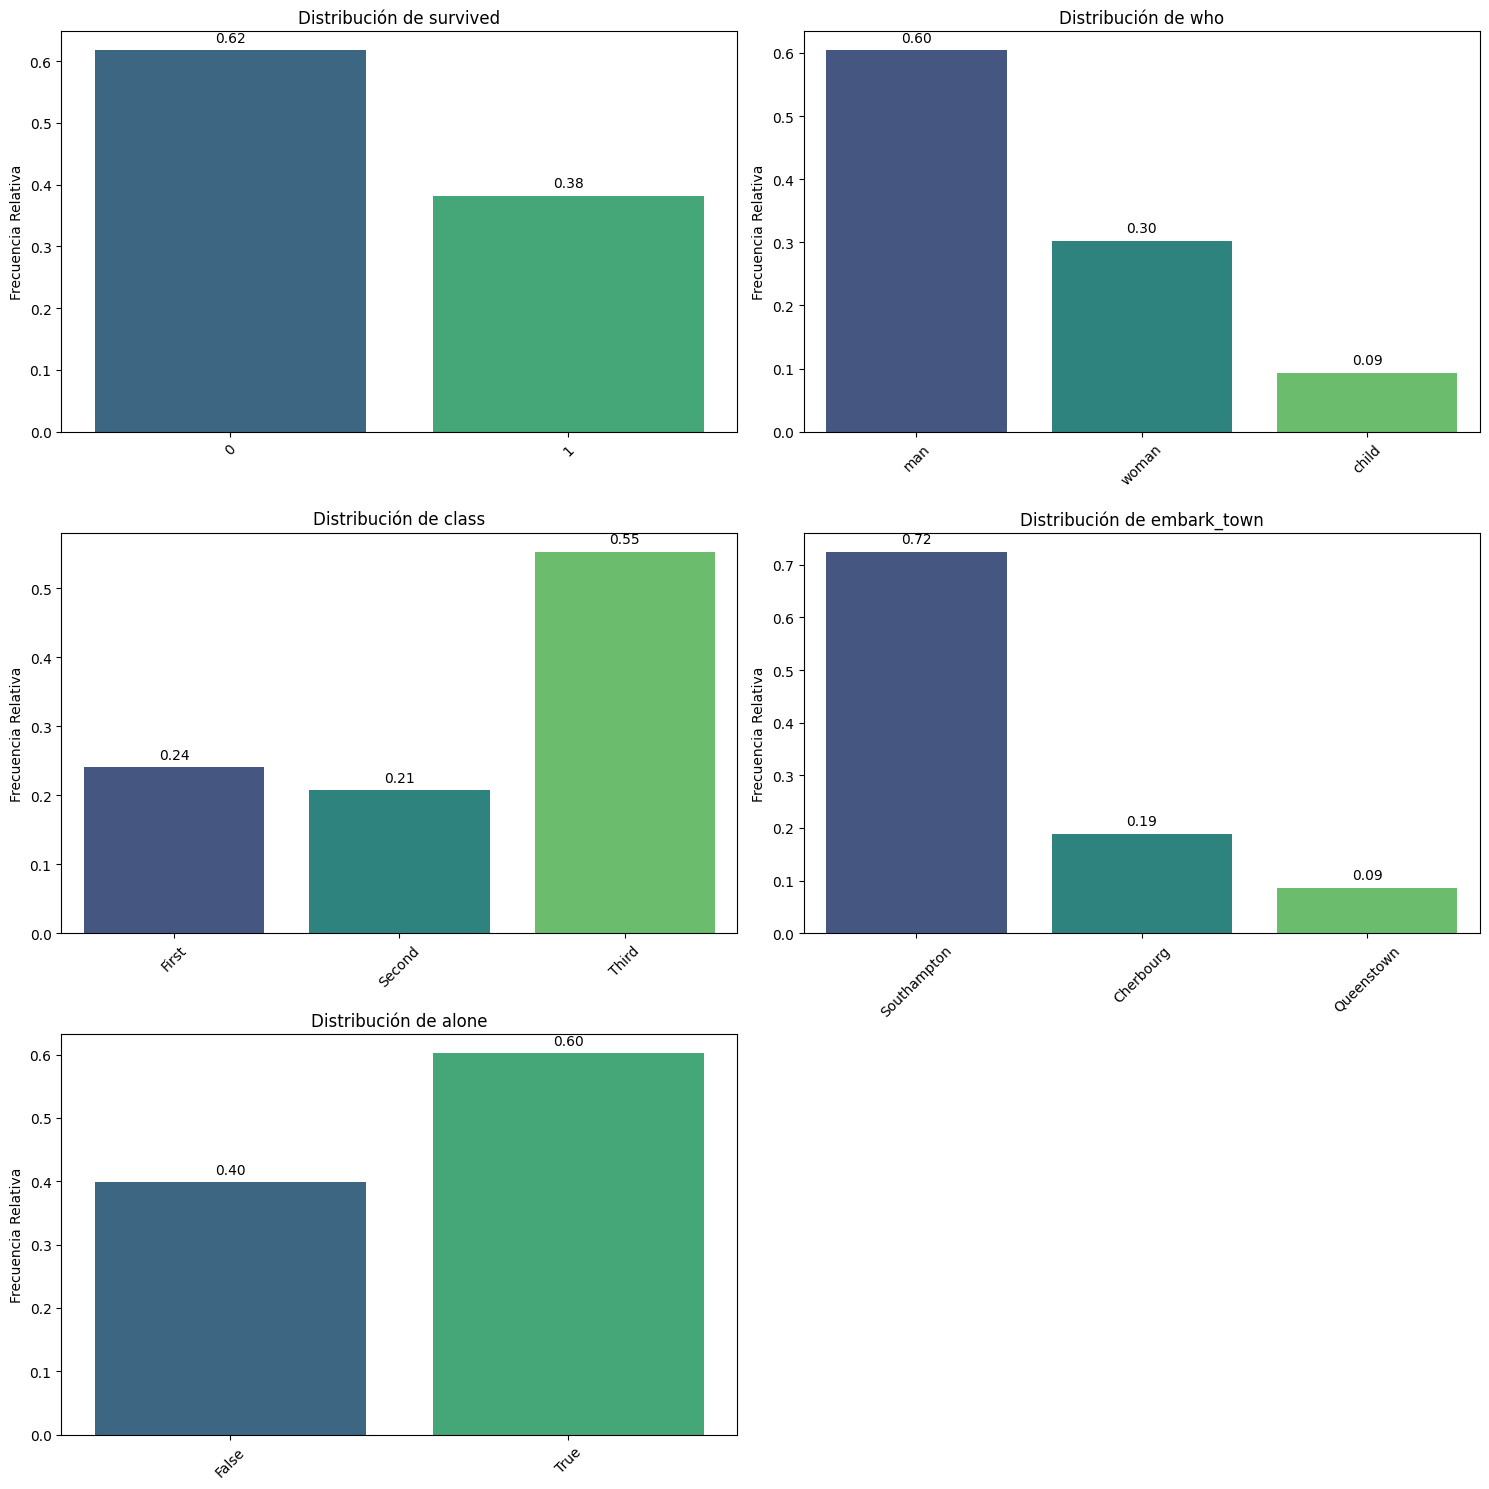

In [51]:
bcvt.pinta_distribucion_categoricas(titanic_mod, col_categoricas, relativa=True)

Aunque el dataset no es muy extenso (unos 900 datos) me parece conveniente hacer análisis relativo. Se pueden presentar algunas ideas sobre los resultados en un análisis univariante, pero también se puede adelantar alguna hipótesis sobre como estas pueden estar relacionadas con las demás.
1. Más del 60% de los pasajeros murió (presumiblemente por una mala gestión de los botes salvavidas).

2. Hay tres resultados que destacan en sus respectivas categorías:
    - La mayoría de los viajeros eran hombres adultos.
    - La mayoría de viajeros viajaban en tercera clase.
    - La mayoría de viajeros partió de Southampton.
    
3. Es de esperar que estas tres variables estén relacionadas con la primera si la distribución es estándar. Es decir, que la mayoría de fallecidos sean hombres adultos, que viajaban en tercera clase y que partieron de Southampton.

4. Un 60 frente a 40 % de los viajeros del Titanic viajaban solos.

### #2.2 Numéricas

In [52]:
col_numericas = ['age', 'fare']     # Vamos a analizar solo estas

In [55]:
titanic_mod[col_numericas].describe()

,age,fare
count,889.000000,889.000000
mean,29.315152,32.096681
std,12.984932,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


(2, 2)


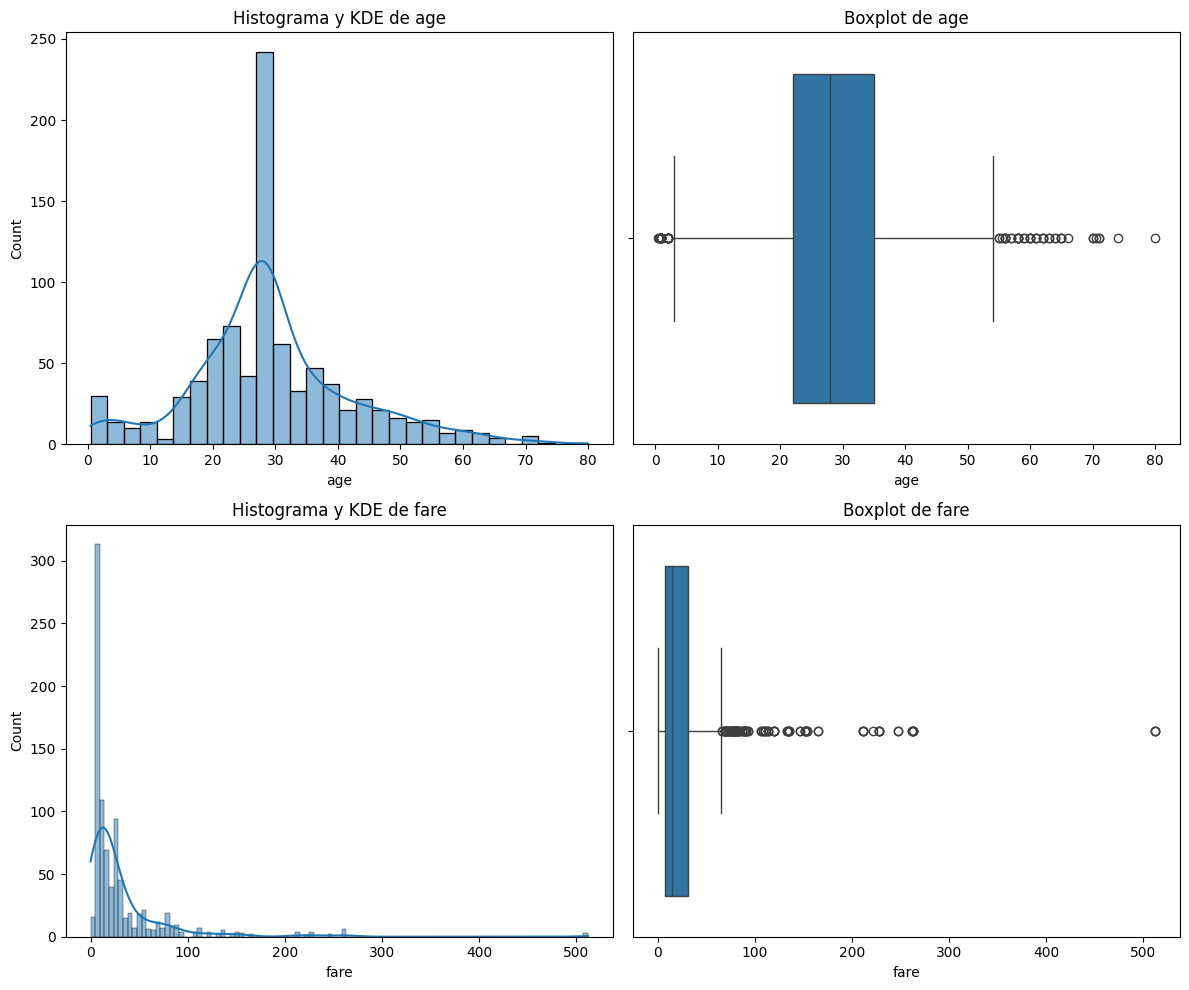

In [54]:
bcvt.plot_combined_graphs(titanic_mod, col_numericas)

1. Analisis de "age":
    - Parece que tenga una distribución similar a una Gaussiana. Los cual es típico de poblaciones estables. Es este caso en que el número de individuos es limitado hay que coger con pinzas esa afirmación. Sin embargo si se observa claramente que entre los 20 y 40 años es donde cae la mayor parte de la población.
    - Por debajo de los 35 años se encuenta el 75% de los individuos. (tercer cuartil).
    - Hay valores outlier, correspondientes a bebes y personas ancianas. No son valores erróneos y no los descartaría.

2. Análisis de "fare":
    - La mayor parte de nuestra población pagó un precio bajo por su billete. Eso casa con el resultado anterior en la que vimos que la tercera clase era la más típica entre los viajeros.
    - La distribución parece "log normal".
    - Hay valores outlier correspondientes a personas que pagaron billetes muy caros (clase muy selecta).